# Tutorial: detecting label errors in a dataset

## Q: What are samples with label errors?

A figure below illustrates what are samples with label errors.

/home/jiaheng/docta_opensource/fix_issue/docta


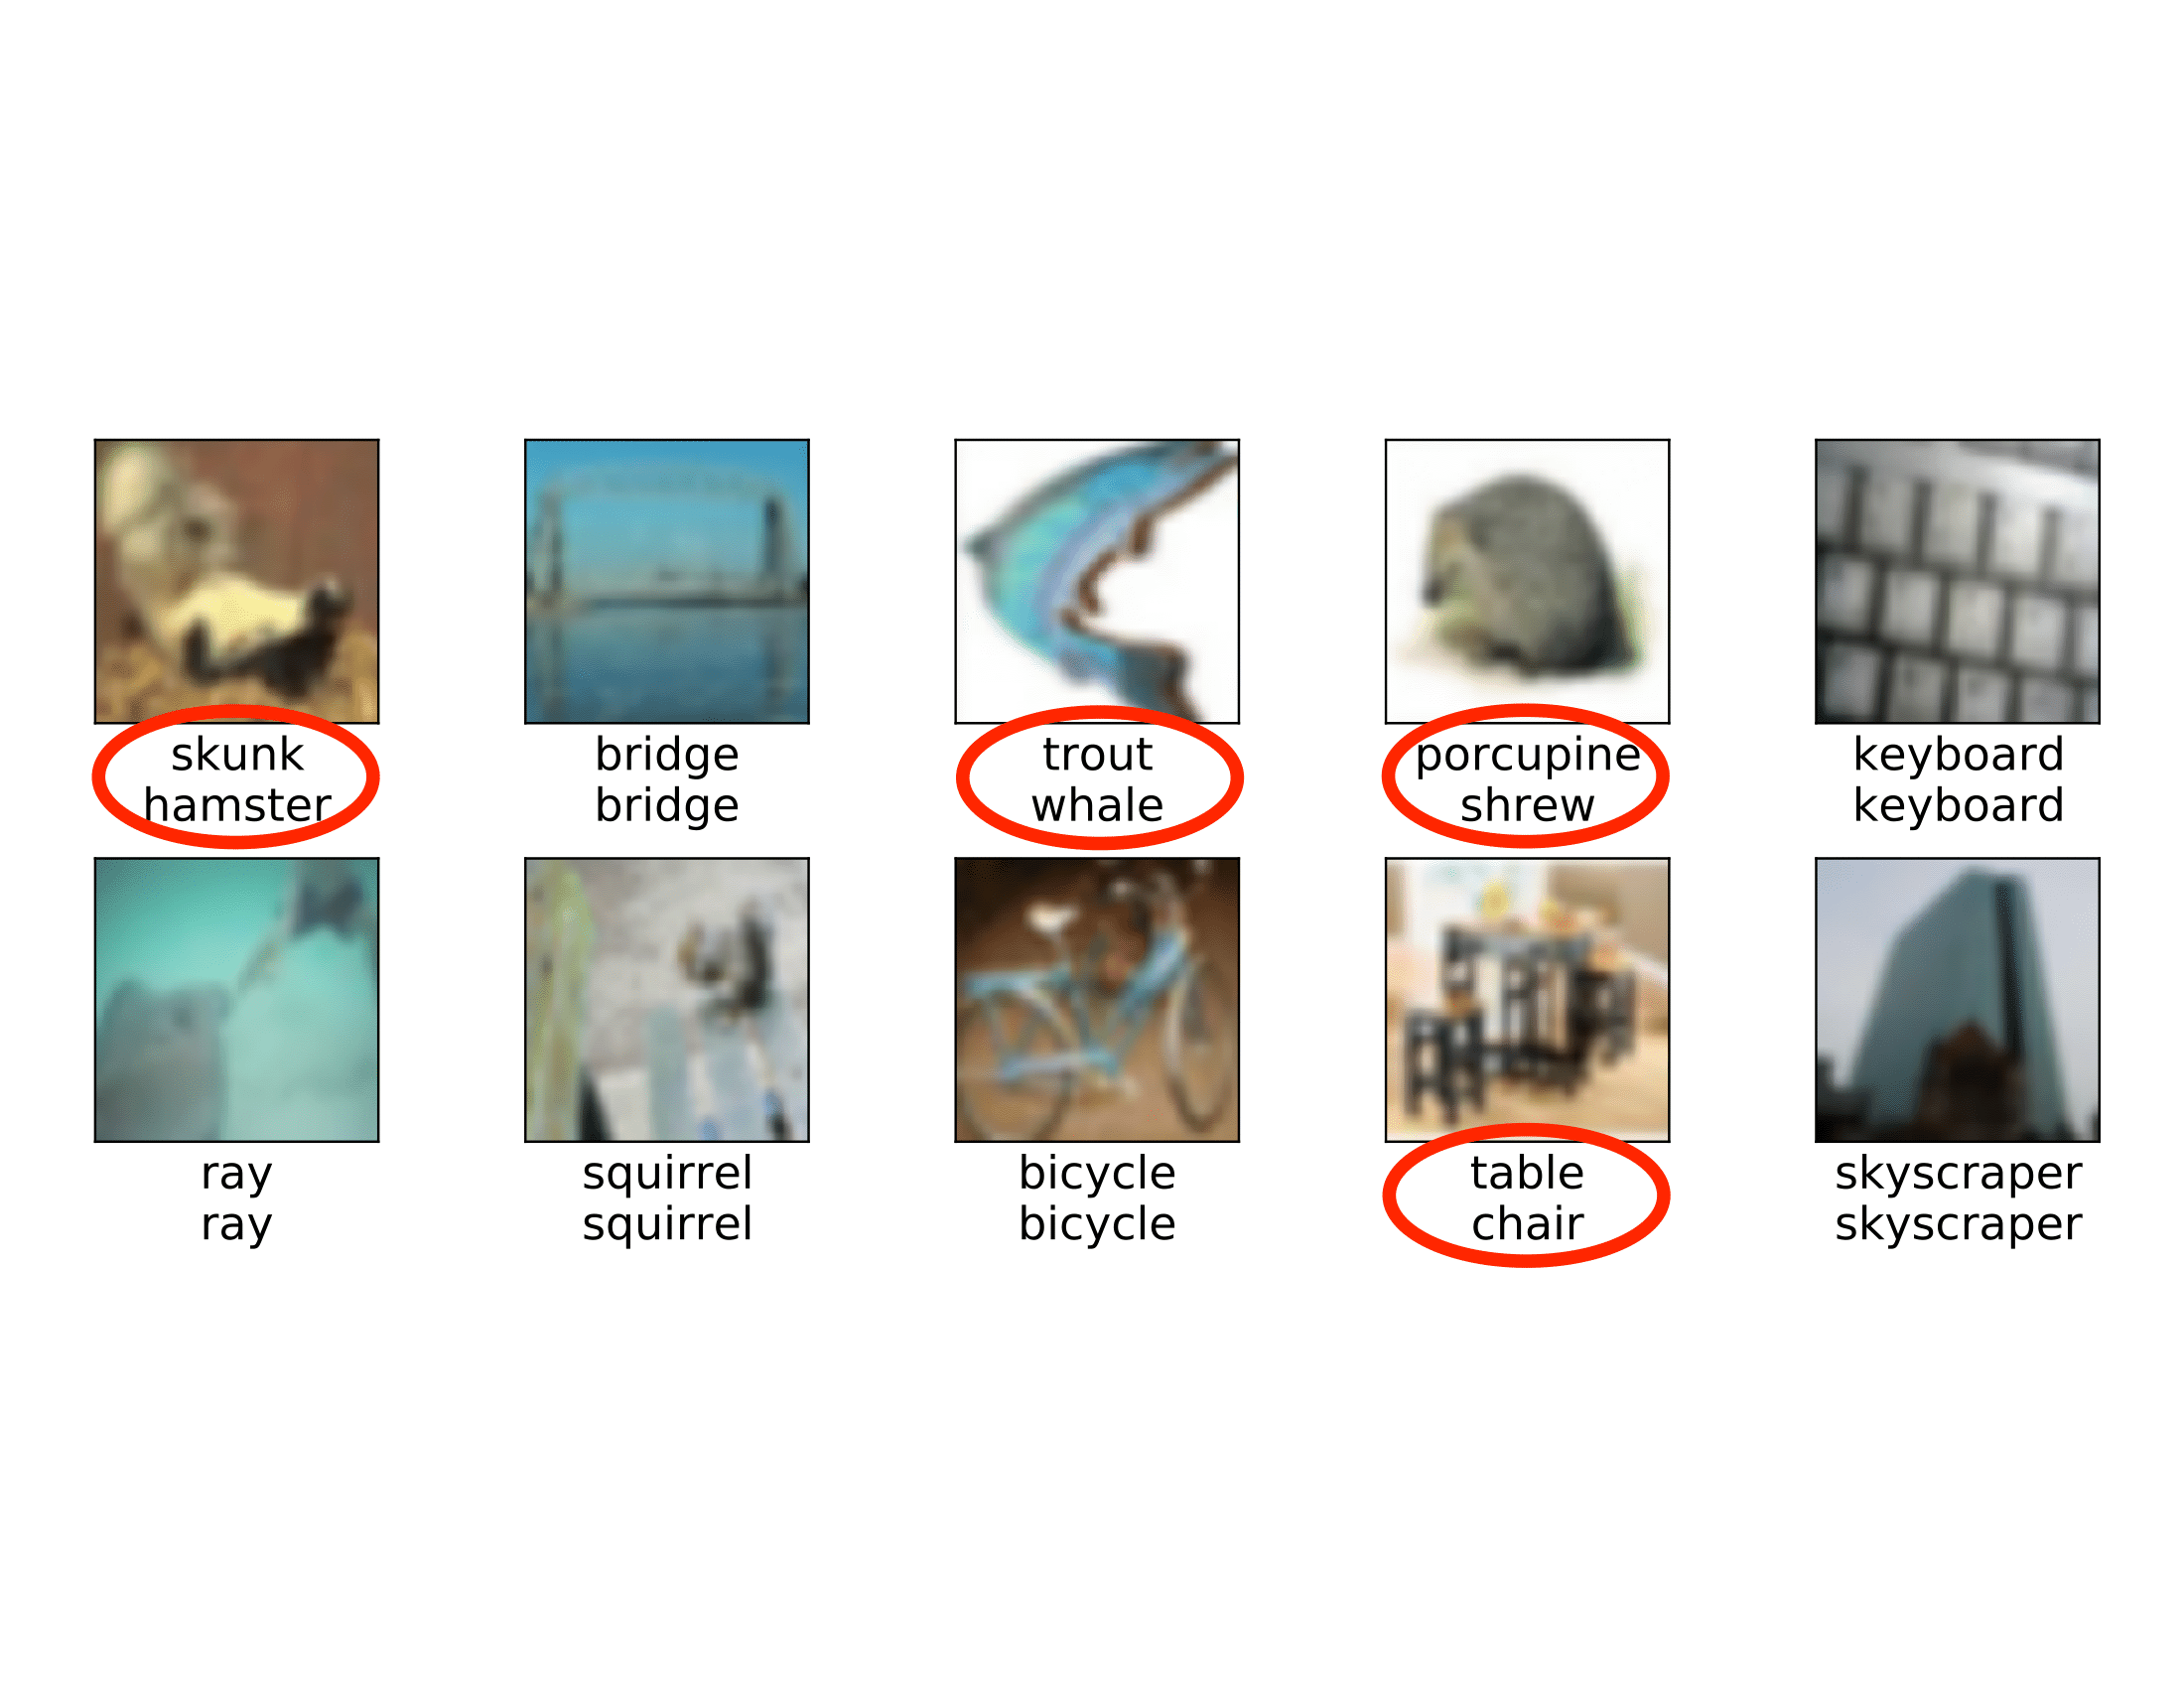

In [2]:
# Set path
import sys
import os
os.chdir('..')
o_path = os.getcwd()
print(o_path)
sys.path.append(o_path) # set path so that modules from other foloders can be loaded
from IPython.display import Image
display(Image(filename='demo_imgs/label_error.png', width = 300, height = 160))

#### The figure above includes 10 selected CIFAR-100N images with ground-truth labels (first row in text) and human annotated labels (second row in text). Images with red-circled text indicate that their ``human annotations`` differ from the ``ground-truth label``. Thus, there exists label error in images with red-circled labels.

### Don't worry about label errors in your data. Docta can help you detecting them!

## Docta CIFAR-10

In [3]:
import torch
torch.cuda.set_device(1)
%run ./tools/docta_cifar10.py

==== Docta: Doctor for your data. Current version: 0.0 ====
Files already downloaded and verified
True T is 
[[65.   6.6  7.2  1.9  1.9  2.3  1.9  1.7  8.5  3.1]
 [ 4.3 59.2  1.5  2.6  1.7  1.5  1.4  1.4  1.6 24.7]
 [ 5.5  3.7 63.2  4.6  5.9  4.8  5.   3.3  2.4  1.7]
 [ 4.   3.4  7.9 48.7  4.3 20.6  4.7  2.4  2.1  1.9]
 [ 3.9  3.3  7.   4.  48.8 10.6  3.9 15.2  2.1  1.2]
 [ 3.3  2.8  5.3 18.3  4.  58.   2.7  2.9  1.2  1.3]
 [ 3.8  3.8  8.4  7.6  5.1  5.8 59.4  2.9  2.   1.3]
 [ 4.   2.8  2.4  2.2  5.1  6.2  2.3 72.2  1.7  1.1]
 [ 8.2  7.3  2.2  1.4  2.1  1.9  1.6  2.2 68.3  4.8]
 [ 4.2 28.2  1.7  2.1  1.8  1.8  1.2  1.4  2.6 55.1]]


49it [05:59,  7.34s/it]


Save 49 instances to ./results/CIFAR_c10/embedded_CIFAR_c10_0.pt
[0, 1]
idx range for training data [0, 0]
#Samples (dataset-train) 50000.
Estimating consensus patterns...


100%|██████████| 50/50 [03:27<00:00,  4.15s/it]


Estimating consensus patterns... [Done]
Use cpu to solve equations


100%|██████████| 1501/1501 [00:27<00:00, 54.58it/s]


Solve equations... [Done]
T_est is 
[[80.   3.4  3.   1.6  1.6  1.6  1.5  1.4  3.9  1.9]
 [ 3.2 72.5  1.7  2.2  1.6  1.6  1.5  1.4  2.  12.3]
 [ 3.9  2.3 75.9  3.2  3.4  2.9  3.3  2.2  1.7  1.2]
 [ 2.3  1.7  3.5 74.8  2.3  9.   3.   1.2  1.2  1.1]
 [ 2.3  1.4  3.8  2.4 75.5  4.4  2.5  5.7  1.3  0.8]
 [ 2.   1.8  3.4  8.2  3.2 73.7  2.2  2.6  1.4  1.4]
 [ 2.   2.   4.1  3.8  2.9  3.4 78.3  1.7  1.1  0.7]
 [ 2.4  1.9  1.8  1.3  4.   3.3  1.7 81.3  1.4  0.9]
 [ 4.7  3.9  1.6  0.8  1.6  1.1  1.2  1.4 81.4  2.5]
 [ 2.6 14.1  0.9  1.4  1.2  1.1  0.8  0.8  1.8 75.4]]
p_est is 
[[10.3]
 [12.4]
 [11. ]
 [ 8.9]
 [ 7.7]
 [11.8]
 [ 8.4]
 [10.8]
 [ 9.3]
 [ 9.3]]
Detecting label errors with simifeat.
Use SimiFeat-rank to detect label errors.


100%|██████████| 21/21 [00:59<00:00,  2.83s/it]


[SimiFeat] We find 13422 corrupted instances from 100000 instances
Files already downloaded and verified
True T is 
[[65.   6.6  7.2  1.9  1.9  2.3  1.9  1.7  8.5  3.1]
 [ 4.3 59.2  1.5  2.6  1.7  1.5  1.4  1.4  1.6 24.7]
 [ 5.5  3.7 63.2  4.6  5.9  4.8  5.   3.3  2.4  1.7]
 [ 4.   3.4  7.9 48.7  4.3 20.6  4.7  2.4  2.1  1.9]
 [ 3.9  3.3  7.   4.  48.8 10.6  3.9 15.2  2.1  1.2]
 [ 3.3  2.8  5.3 18.3  4.  58.   2.7  2.9  1.2  1.3]
 [ 3.8  3.8  8.4  7.6  5.1  5.8 59.4  2.9  2.   1.3]
 [ 4.   2.8  2.4  2.2  5.1  6.2  2.3 72.2  1.7  1.1]
 [ 8.2  7.3  2.2  1.4  2.1  1.9  1.6  2.2 68.3  4.8]
 [ 4.2 28.2  1.7  2.1  1.8  1.8  1.2  1.4  2.6 55.1]]
Found 12968 label errors from 50000 samples
Saved cured labels to ./results/CIFAR_c10/cured_labels_CIFAR_c10.pt


## Load cured labels

In [4]:
cured_labels = torch.load('./results/CIFAR_c10/cured_labels_CIFAR_c10.pt')

## A help function for visualization

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
def visualize_result(num_show, data, noisy_label, cured_labels, label_name):
    plt.rcParams["figure.figsize"] = (10,12)
    size = num_show
    width = int(size / 3)
    cnt = 0
    for i in range(len(dataset)):
        if noisy_label[i] != cured_labels[i]:
            ax = plt.subplot(width,3,cnt+1)
            ax.imshow(data.feature[i])
            ax.set_title(f'Noisy label: {label_name[noisy_label[i]]}. \nSuggest label: {label_name[cured_labels[i]]}.')
            ax.axis('off')
            cnt += 1
        if cnt == num_show:
            break
    plt.show()

## Visualize results

Files already downloaded and verified
True T is 
[[65.   6.6  7.2  1.9  1.9  2.3  1.9  1.7  8.5  3.1]
 [ 4.3 59.2  1.5  2.6  1.7  1.5  1.4  1.4  1.6 24.7]
 [ 5.5  3.7 63.2  4.6  5.9  4.8  5.   3.3  2.4  1.7]
 [ 4.   3.4  7.9 48.7  4.3 20.6  4.7  2.4  2.1  1.9]
 [ 3.9  3.3  7.   4.  48.8 10.6  3.9 15.2  2.1  1.2]
 [ 3.3  2.8  5.3 18.3  4.  58.   2.7  2.9  1.2  1.3]
 [ 3.8  3.8  8.4  7.6  5.1  5.8 59.4  2.9  2.   1.3]
 [ 4.   2.8  2.4  2.2  5.1  6.2  2.3 72.2  1.7  1.1]
 [ 8.2  7.3  2.2  1.4  2.1  1.9  1.6  2.2 68.3  4.8]
 [ 4.2 28.2  1.7  2.1  1.8  1.8  1.2  1.4  2.6 55.1]]


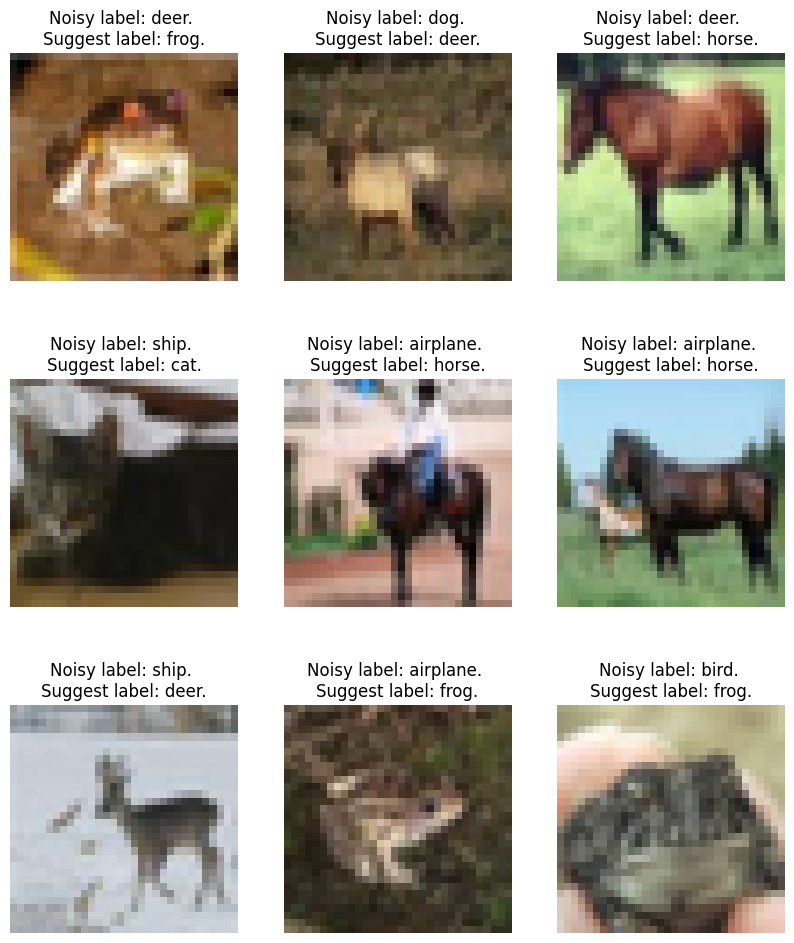

In [6]:
dataset = Cifar10_noisy(cfg, train=True)
noisy_label = dataset.label[:, 1]
feature = dataset.feature
label_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_show = 9 # show 10 pics
visualize_result(num_show, dataset, noisy_label, cured_labels, label_name)
